# Wine数据集关联规则挖掘

Github地址：https://github.com/ZZZhaojiajing/dataMining_homework

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori  #apriori算法
from mlxtend.frequent_patterns import association_rules  #计算关联规则的函数

In [2]:
data1=pd.read_csv("../datamining_dataset/winemag-data_first150k.csv")
data2=pd.read_csv("../datamining_dataset/winemag-data-130k-v2.csv")

由于两个数据集的列不完全相同，只选择公有的、对数据预处理有用的列，并将两个数据集拼接为一个数据集 具体选择的列为：country(国家)、designation(名称)、points(得分)、price(价格)、variety(种类)、winery(酿酒厂)

In [3]:
data_wine1=data1[['country','designation','points','price','variety','winery']]
data_wine2=data2[['country','designation','points','price','variety','winery']]

In [4]:
#对两个数据集进行拼接，我们发现只有points和price两列是数值型数据
data_wine=pd.concat([data_wine1,data_wine2],axis = 0,ignore_index=True)

In [5]:
data_wine.head()

,country,designation,points,price,variety,winery
0,US,Martha's Vineyard,96,235.0,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence red blend,Domaine de la Bégude


#### 以下对同一个国家(对应country列)的同一个名称(对应designation列)的葡萄酒的种类(variety)和酿酒厂(winery)进行关联规则挖掘

In [6]:
df=data_wine[ (data_wine.designation=='Reserve') & (data_wine.country=='Australia') ][['price','variety','winery']]
#利用get_dummies()方法转换成适合进行关联规则挖掘的形式
df=pd.get_dummies(df) 
df=df.drop('price' ,1)

In [7]:
df.head()

,variety_Cabernet Sauvignon,variety_Cabernet Sauvignon-Shiraz,variety_Chardonnay,variety_Durif,variety_Merlot,variety_Pinot Grigio,variety_Pinot Noir,variety_Riesling,variety_Sauvignon Blanc,variety_Shiraz,...,winery_Stonier,winery_Syan,winery_Tahbilk,winery_Tall Poppy,winery_Temple Bruer,winery_Tyrrell's,winery_Warrabilla,winery_Wise,winery_Yellow Tail,winery_Yering Station
8492,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9917,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11386,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14878,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
#导出频繁项集，由于数据集较大，设置最小支持度为0.025
frequent_itemsets = apriori(df,use_colnames=True, min_support=0.025)
frequent_itemsets

,support,itemsets
0,0.151685,(variety_Cabernet Sauvignon)
1,0.275281,(variety_Chardonnay)
2,0.095506,(variety_Pinot Noir)
3,0.067416,(variety_Riesling)
4,0.286517,(variety_Shiraz)
5,0.033708,(variety_Shiraz-Viognier)
6,0.033708,(winery_Green Point)
7,0.028090,(winery_Henry's Drive Vignerons)
8,0.202247,(winery_Jacob's Creek)
9,0.028090,(winery_Passing Clouds)


In [9]:
#导出关联规则，计算支持度和置信度，并使用lift、leverage、conviction指标对规则进行评价，设置lift 最小值为1.25
rules =  association_rules(frequent_itemsets, metric='lift', min_threshold=1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(variety_Cabernet Sauvignon),(winery_Penley Estate),0.151685,0.044944,0.044944,0.296296,6.592593,0.038126,1.357185
1,(winery_Penley Estate),(variety_Cabernet Sauvignon),0.044944,0.151685,0.044944,1.000000,6.592593,0.038126,inf
2,(variety_Cabernet Sauvignon),(winery_Tahbilk),0.151685,0.039326,0.028090,0.185185,4.708995,0.022125,1.179009
3,(winery_Tahbilk),(variety_Cabernet Sauvignon),0.039326,0.151685,0.028090,0.714286,4.708995,0.022125,2.969101
4,(variety_Pinot Noir),(winery_Yering Station),0.095506,0.123596,0.056180,0.588235,4.759358,0.044376,2.128411
5,(winery_Yering Station),(variety_Pinot Noir),0.123596,0.095506,0.056180,0.454545,4.759358,0.044376,1.658240
6,(variety_Riesling),(winery_Jacob's Creek),0.067416,0.202247,0.044944,0.666667,3.296296,0.031309,2.393258
7,(winery_Jacob's Creek),(variety_Riesling),0.202247,0.067416,0.044944,0.222222,3.296296,0.031309,1.199037
8,(winery_Henry's Drive Vignerons),(variety_Shiraz),0.028090,0.286517,0.028090,1.000000,3.490196,0.020042,inf
9,(variety_Shiraz),(winery_Henry's Drive Vignerons),0.286517,0.028090,0.028090,0.098039,3.490196,0.020042,1.077553


In [10]:
#对挖掘结果进行分析：将lift值大于6的降序输出
rules[(rules.lift>6)].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(variety_Shiraz-Viognier),(winery_Yering Station),0.033708,0.123596,0.033708,1.000000,8.090909,0.029542,inf
13,(winery_Yering Station),(variety_Shiraz-Viognier),0.123596,0.033708,0.033708,0.272727,8.090909,0.029542,1.328652
0,(variety_Cabernet Sauvignon),(winery_Penley Estate),0.151685,0.044944,0.044944,0.296296,6.592593,0.038126,1.357185
1,(winery_Penley Estate),(variety_Cabernet Sauvignon),0.044944,0.151685,0.044944,1.000000,6.592593,0.038126,inf


结果表明：国家为Australia，葡萄酒名称为Reserve的最相关的是：
种类为Shiraz-Viognier、酿酒厂为Yering Station的葡萄酒；其次是种类为Cabernet Sauvignon、酿酒厂为Penley Estate的葡萄酒

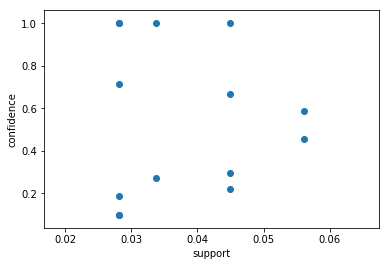

In [11]:
#可视化展示：绘制关联规则支持度和置信度的散点图
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(rules.support,rules.confidence)

#### 以下对同一种类的葡萄酒的价格(price)、国家(country)和酿酒厂(winery)进行关联规则挖掘

In [12]:
df1=data_wine[ (data_wine.variety=='Shiraz-Viognier')  ][['price','country','winery']]
df1.head(5)

,price,country,winery
7636,125.0,Australia,Torbreck
10512,225.0,Australia,Torbreck
15814,23.0,Australia,Off the Leash.
19943,20.0,Australia,Wirra Wirra
20180,18.0,Australia,Domaine Terlato & Chapoutier


由于price一列为数值型数据，首先要将这一列的数据离散化：
思路为当价格在一个区间内时，将其转换为同一个等级

In [13]:
for index,i in enumerate(df1.price.values):
    if i>=10.0 and i <30.0:
        df1.iat[index,0]=5
    elif i>=30.0 and i <50.0:
        df1.iat[index,0]=4
    elif i>=50.0 and i <100.0:
        df1.iat[index,0]=3
    elif i>=100.0 and i <200.0:
        df1.iat[index,0]=2
    else:
        df1.iat[index,0]=1

In [14]:
class_mapping = {5: 'D', 4: 'C',3: 'B',2: 'A',1: 'S'}
price_level=df1.price.map(class_mapping)
df1=pd.concat([df1,price_level],axis = 1)

In [15]:
df1.columns = ['price_float', 'country', 'winery', 'price_level']
df1.head(10)

,price_float,country,winery,price_level
7636,2.0,Australia,Torbreck,A
10512,1.0,Australia,Torbreck,S
15814,5.0,Australia,Off the Leash.,D
19943,5.0,Australia,Wirra Wirra,D
20180,5.0,Australia,Domaine Terlato & Chapoutier,D
20306,5.0,Australia,Gemtree,D
20580,4.0,Australia,De Bortoli,C
20775,5.0,Australia,De Bortoli,D
21271,5.0,Australia,Innocent Bystander,D
21772,5.0,Australia,Yalumba,D


In [16]:
df1=df1.drop('price_float',1)

In [17]:
#将price一列离散化后的数据如下
df1.head(10)

,country,winery,price_level
7636,Australia,Torbreck,A
10512,Australia,Torbreck,S
15814,Australia,Off the Leash.,D
19943,Australia,Wirra Wirra,D
20180,Australia,Domaine Terlato & Chapoutier,D
20306,Australia,Gemtree,D
20580,Australia,De Bortoli,C
20775,Australia,De Bortoli,D
21271,Australia,Innocent Bystander,D
21772,Australia,Yalumba,D


In [18]:
#利用get_dummies()方法转换成适合进行关联规则挖掘的形式
df1=pd.get_dummies(df1)
df1.head(10)

,country_Australia,country_New Zealand,country_South Africa,country_US,winery_5OS Project,winery_Alkoomi,winery_Angove's,winery_Battle of Bosworth,winery_Bilancia,winery_Creed of Barossa,...,winery_Wirra Wirra,winery_Woop Woop,winery_Yalumba,winery_Yarra Yering,winery_Yering Station,price_level_A,price_level_B,price_level_C,price_level_D,price_level_S
7636,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10512,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15814,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19943,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
20180,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20580,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20775,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21772,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
pd.options.display.max_colwidth=100

In [20]:
#导出频繁项集，设置最小支持度为0.05
frequent_itemsets1 = apriori(df1,use_colnames=True, min_support=0.05)
frequent_itemsets1

,support,itemsets
0,0.930233,(country_Australia)
1,0.062016,(winery_De Bortoli)
2,0.069767,(winery_Domaine Terlato & Chapoutier)
3,0.062016,(winery_Hugh Hamilton)
4,0.054264,(winery_Innocent Bystander)
5,0.054264,(winery_Kangarilla Road)
6,0.100775,(winery_Torbreck)
7,0.085271,(winery_Yalumba)
8,0.069767,(winery_Yering Station)
9,0.054264,(price_level_A)


In [21]:
#导出关联规则，计算支持度和置信度，并使用lift、leverage、conviction指标对规则进行评价，设置lift 最小值为1.5
rules1 =  association_rules(frequent_itemsets1, metric='lift', min_threshold=1.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(winery_Domaine Terlato & Chapoutier),(price_level_D),0.069767,0.604651,0.069767,1.000000,1.653846,0.027582,inf
1,(price_level_D),(winery_Domaine Terlato & Chapoutier),0.604651,0.069767,0.069767,0.115385,1.653846,0.027582,1.051567
2,(winery_Innocent Bystander),(price_level_D),0.054264,0.604651,0.054264,1.000000,1.653846,0.021453,inf
3,(price_level_D),(winery_Innocent Bystander),0.604651,0.054264,0.054264,0.089744,1.653846,0.021453,1.038978
4,(winery_Kangarilla Road),(price_level_D),0.054264,0.604651,0.054264,1.000000,1.653846,0.021453,inf
5,(price_level_D),(winery_Kangarilla Road),0.604651,0.054264,0.054264,0.089744,1.653846,0.021453,1.038978
6,(price_level_A),(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
7,(winery_Torbreck),(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
8,"(country_Australia, winery_Domaine Terlato & Chapoutier)",(price_level_D),0.069767,0.604651,0.069767,1.000000,1.653846,0.027582,inf
9,"(country_Australia, price_level_D)",(winery_Domaine Terlato & Chapoutier),0.573643,0.069767,0.069767,0.121622,1.743243,0.029746,1.059034


In [22]:
#对挖掘结果进行分析：将lift值大于9的降序输出
rules1[(rules1.lift>9)].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(price_level_A),(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
7,(winery_Torbreck),(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
20,"(price_level_A, country_Australia)",(winery_Torbreck),0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
21,"(country_Australia, winery_Torbreck)",(price_level_A),0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096
22,(price_level_A),"(country_Australia, winery_Torbreck)",0.054264,0.100775,0.054264,1.000000,9.923077,0.048795,inf
23,(winery_Torbreck),"(price_level_A, country_Australia)",0.100775,0.054264,0.054264,0.538462,9.923077,0.048795,2.049096


In [ ]:
结果表明：国家为Australia，酿酒厂为Torbreck生产的葡萄酒价格均在100-200之间，他们之间的相关性很强

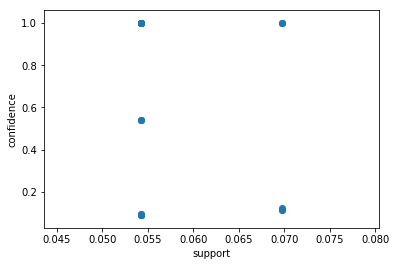

In [23]:
#可视化展示：绘制关联规则支持度和置信度的散点图
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(rules1.support,rules1.confidence)